InferenceAPI

In [6]:
token = "/*huggingface token*/"

**질문답변**

In [3]:
import json
import requests

API_URL = "https://api-inference.huggingface.co/models/deepset/roberta-base-squad2"
headers = {"Authorization" : f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": {
	"question": "What is my name?",
	"context": "My name is Clara and I live in Berkeley."
},
})

print(output)

{'score': 0.9331294298171997, 'start': 11, 'end': 16, 'answer': 'Clara'}


Text로 Image 생성하기

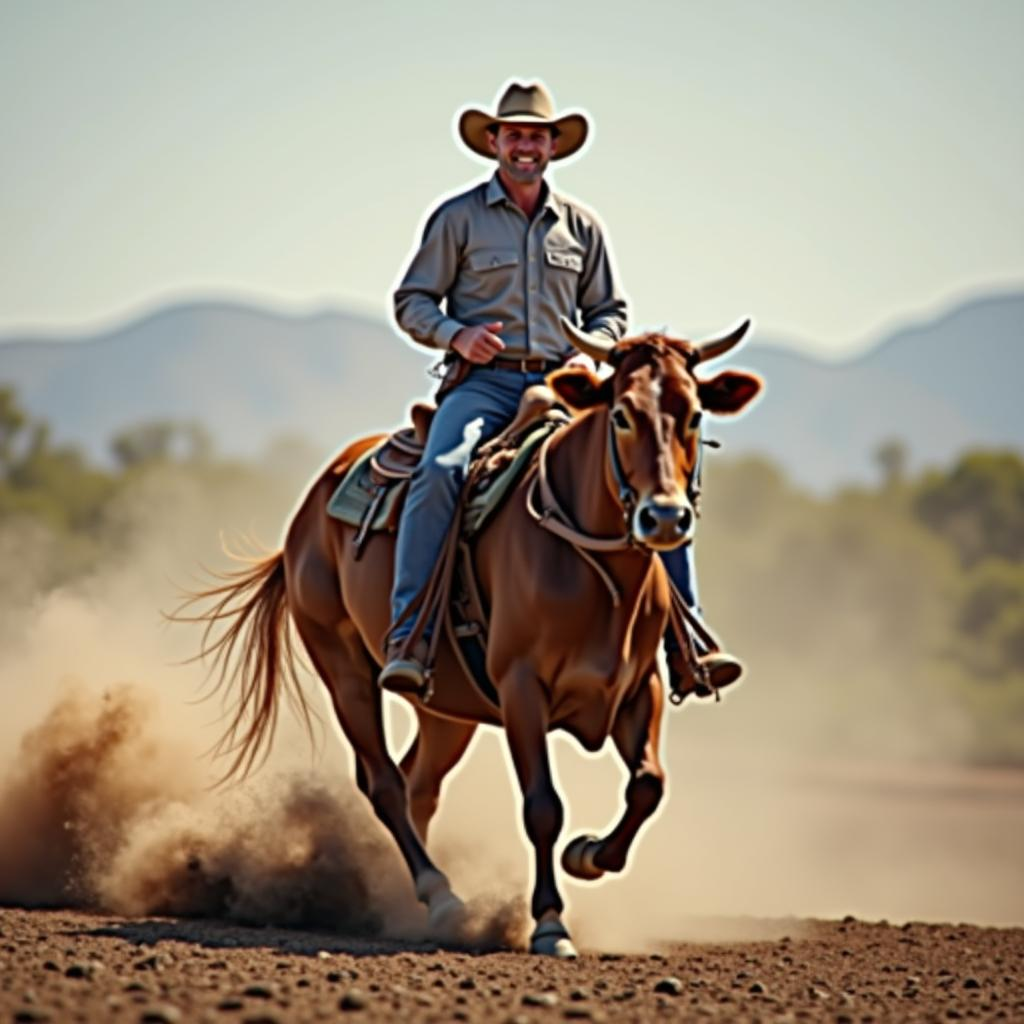

In [4]:
import requests

API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"
headers = {"Authorization" : f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "Cowboy riding a cow",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image

* 한글 입력해서 영어 이미지 생성 모델 추론하기

In [ ]:
!pip install protobuf
!pip install diffusers

In [1]:
import huggingface_hub

huggingface_hub.login()

In [2]:
# 사용자가 입력한 값
text = '인공지능을 공부하는 학생들'

from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
import torch
from diffusers import FluxPipeline

article_ko = "인공지능을 공부하는 학생들"

# 번역 모델 불러오기
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
# 번역 모델에서 사용할 토크나이저 가져오기
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# 전처리
# Translate Korean to English
tokenizer.src_lang = "ko_KR"

# 한글 토크나이징
encoded_ko = tokenizer(article_ko, return_tensors="pt")

# 추론
generated_tokens = model.generate(
    **encoded_ko,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)

# 후처리
# 번역 결과 decoding(자연어로 변경)
translated_text = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

print(translated_text)

# text to image 모델 가져오기
image_creator = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)

# GPU연산이 부족할때 CPU로 연산을 할 수 있게 해주는 transformers의 기능
# GPU가 충분하면 사용하지 않아도된다.
image_creator.enable_model_cpu_offload() 

# image 생성 프롬프트 (번역된 결과로 진행)
prompt = translated_text

image = image_creator(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]

image

['Students study artificial intelligence.']


In [3]:
!pip install sentencepiece

Students in AI.


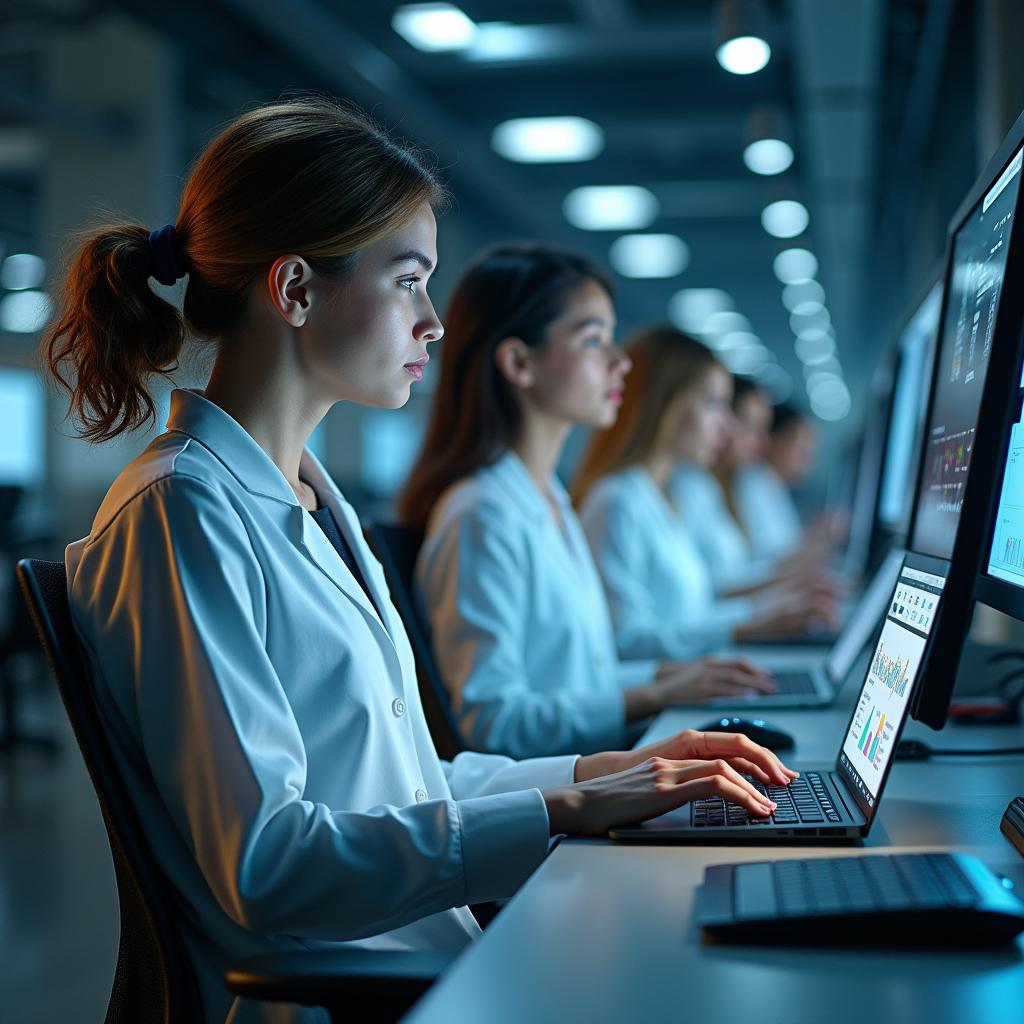

In [8]:
from transformers import pipeline
import requests

# 모델 불러오기
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")

# 추론, 토큰화
result = translator("인공지능을 공부하는 학생들")

translation_text = result[0]['translation_text']

# text to image
# 번역 결과
print(translation_text)

API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"
headers = {"Authorization" : f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": translation_text,
})

import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image